In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
TIME_LEN = 4

In [0]:
char_id = {
    '_': 0,
    'c': 1,
    'a': 2,
    't': 3,
}

In [0]:
def char2id(char):
    if char in char_id:
        return char_id[char]
    return -1

In [0]:
possible_paths = [
    'cat_',
    'ca_t',
    'c_at',
    'caat',
    'catt',
    'ccat',
    '_cat',
]

In [0]:
possible_paths_id = np.array([[char2id[char] for char in path] for path in possible_paths])

In [10]:
possible_paths_id

array([[1, 2, 3, 0],
       [1, 2, 0, 3],
       [1, 0, 2, 3],
       [1, 2, 2, 3],
       [1, 2, 3, 3],
       [1, 1, 2, 3],
       [0, 1, 2, 3]])

In [0]:
prob_mat = np.array([
    [(possible_paths_id[:, 0] == 0).sum(), (possible_paths_id[:, 1] == 0).sum(), (possible_paths_id[:, 2] == 0).sum(), (possible_paths_id[:, 3] == 0).sum()],
    [(possible_paths_id[:, 0] == 1).sum(), (possible_paths_id[:, 1] == 1).sum(), (possible_paths_id[:, 2] == 1).sum(), (possible_paths_id[:, 3] == 1).sum()],
    [(possible_paths_id[:, 0] == 2).sum(), (possible_paths_id[:, 1] == 2).sum(), (possible_paths_id[:, 2] == 2).sum(), (possible_paths_id[:, 3] == 2).sum()],
    [(possible_paths_id[:, 0] == 3).sum(), (possible_paths_id[:, 1] == 3).sum(), (possible_paths_id[:, 2] == 3).sum(), (possible_paths_id[:, 3] == 3).sum()],
])

In [0]:
prob_mat = prob_mat / prob_mat.sum(axis=0, keepdims=True)

In [17]:
prob_mat

array([[0.14285714, 0.14285714, 0.14285714, 0.14285714],
       [0.85714286, 0.28571429, 0.        , 0.        ],
       [0.        , 0.57142857, 0.57142857, 0.        ],
       [0.        , 0.        , 0.28571429, 0.85714286]])

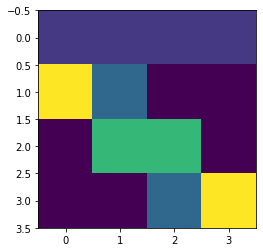

In [37]:
plt.imshow(prob_mat)

In [0]:
def ctc_prob(path: str):
    p = 1.0
    for i, char in enumerate(path):
        charid = char2id(char)
        if charid == -1:
            p *= 0.0
        else:
            p *= prob_mat[charid, i]
    return p

In [0]:
def ctc_loss(prob: float):
    return -np.log(prob + 1e-10)

In [21]:
ctc_prob('caat')

0.23990004164931272

In [22]:
ctc_prob('dog')

0.0

In [23]:
ctc_prob('cat_')

0.019991670137442727

In [33]:
ctc_loss(ctc_prob('caat'))

1.427532935108522

In [32]:
ctc_loss(ctc_prob('cat_'))

3.912439580311279

In [31]:
ctc_loss(ctc_prob('dog_'))

23.025850929940457